In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pt = pd.read_csv('./periodic_table.csv', sep=';') 
pt.head(30)

,AtomicNumber,Symbol,Radioactive,Price($/kg),Supply risk,toxicity
0,1,H,0,0.00000,0,0
1,2,He,0,0.00000,3,0
2,3,Li,0,75.20000,1,0
3,4,Be,0,831.60000,0,0
4,5,B,0,0.00000,1,0
5,6,C,0,0.00000,2,0
6,7,N,0,0.00000,0,0
7,8,O,0,0.00000,0,0
8,9,F,0,0.00000,0,0
9,10,Ne,0,0.00000,0,0


In [2]:
mof_compo = pd.read_csv('./mof_compo.txt', sep=',',header=None)
mof_compo.columns=['Element','Number','Mass','Percentage']
mof_compo.head(10)

,Element,Number,Mass,Percentage
0,ABACUF,X,X,#
1,C,6,72.06444,0.10592009307271566
2,H,14,14.111174,0.020740560301936505
3,Ba,2,274.654,0.40368560753117133
4,Cu,1,63.546,0.09339971606521591
5,O,16,255.99048,0.37625402302896066
6,ABACUF01,X,X,#
7,C,6,72.06444,0.10592009307271566
8,H,14,14.111174,0.020740560301936505
9,Ba,2,274.654,0.40368560753117133


In [3]:
mof_dict={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']

    
    if len(element)>3:
        mof=element
        mof_dict[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        price = pt.iloc[index]['Price($/kg)']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict[mof]+= float(price) * float(percentage)



In [4]:
mof_dict

{'ABACUF': 1.1069854695022472,
 'ABACUF01': 1.1069854695022472,
 'ABADUG': 0.39550738688043713,
 'ABAFUH': 3.1147383499748194,
 'ABAGAO': 1.2973402251426203}

In [5]:
mof_df=pd.DataFrame.from_dict(mof_dict,orient="index")
mof_df.columns=["Price"]

In [6]:
mof_df

,Price
ABACUF,1.106985
ABACUF01,1.106985
ABADUG,0.395507
ABAFUH,3.114738
ABAGAO,1.297340


In [7]:
mof_dict2={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict2[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        supply = pt.iloc[index]['Supply risk']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict2[mof]+= float(supply) * float(percentage)
        
mof_dict2
mof_df2=pd.DataFrame.from_dict(mof_dict2,orient="index")
mof_df2.columns=["Supply risk"]
mof_score = pd.merge(mof_df, mof_df2, left_index=True,right_index=True)
mof_score

,Price,Supply risk
ABACUF,1.106985,0.305240
ABACUF01,1.106985,0.305240
ABADUG,0.395507,1.710506
ABAFUH,3.114738,1.117284
ABAGAO,1.297340,1.084087


In [8]:
mof_df

,Price
ABACUF,1.106985
ABACUF01,1.106985
ABADUG,0.395507
ABAFUH,3.114738
ABAGAO,1.297340


In [9]:
mof_df2

,Supply risk
ABACUF,0.305240
ABACUF01,0.305240
ABADUG,1.710506
ABAFUH,1.117284
ABAGAO,1.084087


In [10]:
mof_dict3={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict3[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        radioactive = pt.iloc[index]['Radioactive']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict3[mof]+= float(radioactive) * float(percentage)
        
mof_dict3
mof_df3=pd.DataFrame.from_dict(mof_dict3,orient="index")
mof_df3.columns=["Radioactive"]
mof_score = pd.merge(mof_score, mof_df3, left_index=True,right_index=True)
mof_score

,Price,Supply risk,Radioactive
ABACUF,1.106985,0.305240,0.0
ABACUF01,1.106985,0.305240,0.0
ABADUG,0.395507,1.710506,0.0
ABAFUH,3.114738,1.117284,0.0
ABAGAO,1.297340,1.084087,0.0


In [11]:
mof_dict4={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict4[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        toxicity = pt.iloc[index]['toxicity']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict4[mof]+= float(toxicity) * float(percentage)
        
mof_dict4
mof_df4=pd.DataFrame.from_dict(mof_dict4,orient="index")
mof_df4.columns=["Toxicity"]
mof_score = pd.merge(mof_score, mof_df4, left_index=True,right_index=True)
mof_score

,Price,Supply risk,Radioactive,Toxicity
ABACUF,1.106985,0.305240,0.0,0.0
ABACUF01,1.106985,0.305240,0.0,0.0
ABADUG,0.395507,1.710506,0.0,0.0
ABAFUH,3.114738,1.117284,0.0,0.0
ABAGAO,1.297340,1.084087,0.0,0.0


<AxesSubplot:>

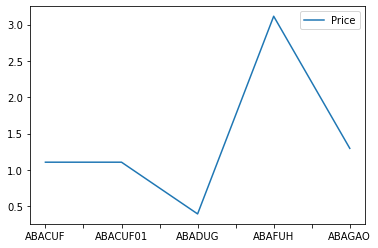

In [12]:
mof_score.plot(y='Price')

In [13]:
mof_score_indexed = mof_score.reset_index()
mof_score_indexed
#mof_score.plot(kind='scatter', x=mof_score.index, y='Price')

,index,Price,Supply risk,Radioactive,Toxicity
0,ABACUF,1.106985,0.305240,0.0,0.0
1,ABACUF01,1.106985,0.305240,0.0,0.0
2,ABADUG,0.395507,1.710506,0.0,0.0
3,ABAFUH,3.114738,1.117284,0.0,0.0
4,ABAGAO,1.297340,1.084087,0.0,0.0


Text(0, 0.5, 'Price ($/kg)')

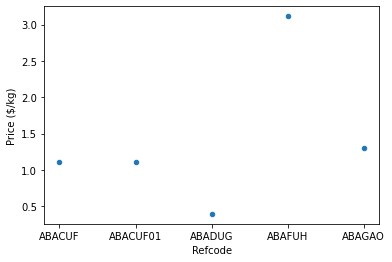

In [14]:
mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price')
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")

Text(0, 0.5, 'Price ($/kg)')

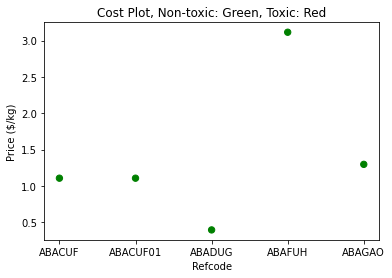

In [32]:
#colours in red when toxic element in the MOF
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('green')
        #elif l==1:
            #cols.append('blue')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above

cols=pltcolor(mof_score_indexed['Toxicity'])

#fig, ax = plt.subplots()

mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price', c = cols, s=40, title='Cost Plot, Non-toxic: Green, Toxic: Red') #Pass on the list created by the function here
#mof_score_plot.grid(True)
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")
#mof_score_plot.legend() - did not manage to add a legend

Text(0, 0.5, 'Price ($/kg)')

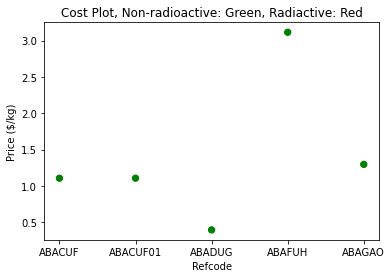

In [35]:
#colours in red when radioactive element in MOF
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('green')
        #elif l==1:
            #cols.append('blue')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above

cols=pltcolor(mof_score_indexed['Radioactive'])

mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price', c = cols, s=40, title='Cost Plot, Non-radioactive: Green, Radiactive: Red') #Pass on the list created by the function here
#mof_score_plot.grid(True)
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")

In [14]:
mof_compo

,Element,Number,Mass,Percentage
0,ABACUF,X,X,#
1,C,6,72.06444,0.10592009307271566
2,H,14,14.111174,0.020740560301936505
3,Ba,2,274.654,0.40368560753117133
4,Cu,1,63.546,0.09339971606521591
5,O,16,255.99048,0.37625402302896066
6,ABACUF01,X,X,#
7,C,6,72.06444,0.10592009307271566
8,H,14,14.111174,0.020740560301936505
9,Ba,2,274.654,0.40368560753117133


In [15]:
#pd.merge(pt,mof_compo,on="Element",how="inner")

In [16]:
pt=pt.rename(columns={"Symbol":"Element"})

In [20]:
pt

,AtomicNumber,Element,Radioactive,Price($/kg),Supply risk,toxicity
0,1,H,0,0.0,0,0
1,2,He,0,0.0,3,0
2,3,Li,0,75.2,1,0
3,4,Be,0,831.6,0,0
4,5,B,0,0.0,1,0
...,...,...,...,...,...,...
113,114,Fl,1,1.0,0,0
114,115,Mc,1,1.0,0,0
115,116,Lv,1,1.0,0,0
116,117,Ts,1,0.0,0,0
